## License
This file is part of the project megFingerprinting. All of megFingerprinting code is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. megFingerprinting is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with megFingerprinting. If not, see https://www.gnu.org/licenses/.

In [8]:
import difflib
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from os import listdir
from os.path import isfile, join
import pandas as pd
import re
import seaborn as sns
import scipy as sp
import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import pearsonr
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("husl", 8))
import math

In [9]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sp.stats.sem(a)
    h = np.percentile(a, (1-((1-confidence)/2))*100)
    l = np.percentile(a, ((1-confidence)/2)*100)
    return m, l, h



# I. Subject Identifiability all subjects

In [10]:
# please not you will have to chnage the index into the file name depending on the folder (i.e., challenge)
# note that the specparam data has only 115 features
# also note narrow band analyses are preformed by subsetting into the psd_martix
# i.e., delta 0:12, theta 12:24, alpha 24:39, beta 39:60, gamma 90:150, h gamma 150:451

# Parameters
n_subs = 133 # Change here to get number of participants! 
n_feats = int(68*451)
n_measurements = 2

# Warangle data set into two big feature matrices
def prune_subject_csv(filename):
    '''
    This function takes in the subject's csv file from MATLAB, takes out the 
    doubled correlations (because of symmetry) and outputs a numpy array ready to be concatenated
    in the grand feature matrix
    Args:
        filename (string): Name of the csv matrix
    Returns: 
        sub_feat (np.array): Subject's features 
    '''
    #print(filename)
    #print(filename[19:23])
    sub_feat = np.zeros([1, (n_feats)+1]) # Number of unique values in corr matrix + subject label
    psd_matrix = pd.read_csv(filename, header=None)
    mat=np.asmatrix(psd_matrix)
    sub_feat[0, :-1]=mat[:,0:451].flatten()
    sub_feat[0, -1] = int(filename[19:23])    
    return sub_feat


# Get n subjects: both training and testing datasets
onlyfiles = [f for f in listdir('NEWspectraFUL/') if isfile(join('NEWspectraFUL/', f))]
sub_target = np.zeros([n_subs, (n_feats)+1])
sub_database = np.zeros([n_subs, (n_feats)+1])
iv = 0
it = 0
for iFile in sorted(onlyfiles)[0:(n_subs*2)]: 
    sub = 'NEWspectraFUL/' + iFile
    #print(sub)
    #print(sub[28])
    if sub[28] == 'v':
        sub_target[iv, :] = prune_subject_csv(sub)
        iv += 1
    else:
        sub_database[it, :] = prune_subject_csv(sub)
        it += 1
        
        
# Correlations can be computed as the dot product between two z-scored vectors
z_target = sp.stats.zscore(sub_target[:, :-1], axis = 1)
z_database = sp.stats.zscore(sub_database[:,:-1], axis = 1)
predictions = z_target.dot(z_database.transpose()) / (sub_database.shape[1] - 1) # target, database
target_from_database = accuracy_score(range(n_subs), predictions.argmax(axis = 1))
database_from_target = accuracy_score(range(n_subs), predictions.argmax(axis = 0))

print('When predicting the target from the database, we get a ' + str(target_from_database*100)[0:5] + '% accuracy')
print('When predicting the database from the target, we get a ' + str(database_from_target*100)[0:5] + '% accuracy')

When predicting the target from the database, we get a 77.44% accuracy
When predicting the database from the target, we get a 82.70% accuracy


## look @ only controls

In [11]:
# please not you will have to chnage the index into the file name depending on the folder (i.e., challenge)
# note that the specparam data has only 115 features
# also note narrow band analyses are preformed by subsetting into the psd_martix
# i.e., delta 0:12, theta 12:24, alpha 24:39, beta 39:60, gamma 90:150, h gamma 150:451

# Parameters
n_subs = 54 # Change here to get number of participants! 
n_feats = int(68*451)
n_measurements = 2

# Warangle data set into two big feature matrices
def prune_subject_csv(filename):
    '''
    This function takes in the subject's csv file from MATLAB, takes out the 
    doubled correlations (because of symmetry) and outputs a numpy array ready to be concatenated
    in the grand feature matrix
    Args:
        filename (string): Name of the csv matrix
    Returns: 
        sub_feat (np.array): Subject's features 
    '''
    #print(filename)
    #print(filename[19:23])
    sub_feat = np.zeros([1, (n_feats)+1]) # Number of unique values in corr matrix + subject label
    psd_matrix = pd.read_csv(filename, header=None)
    mat=np.asmatrix(psd_matrix)
    sub_feat[0, :-1]=mat[:,0:451].flatten()
    sub_feat[0, -1] = int(filename[19:23])    
    return sub_feat


# Get n subjects: both training and testing datasets
onlyfiles = [f for f in listdir('NEWspectraCTL/') if isfile(join('NEWspectraCTL/', f))]
sub_target = np.zeros([n_subs, (n_feats)+1])
sub_database = np.zeros([n_subs, (n_feats)+1])
iv = 0
it = 0
for iFile in sorted(onlyfiles)[0:(n_subs*2)]: 
    sub = 'NEWspectraCTL/' + iFile
    #print(sub)
    #print(sub[28])
    if sub[28] == 'v':
        sub_target[iv, :] = prune_subject_csv(sub)
        iv += 1
    else:
        sub_database[it, :] = prune_subject_csv(sub)
        it += 1
        
        
# Correlations can be computed as the dot product between two z-scored vectors
z_target = sp.stats.zscore(sub_target[:, :-1], axis = 1)
z_database = sp.stats.zscore(sub_database[:,:-1], axis = 1)
predictions = z_target.dot(z_database.transpose()) / (sub_database.shape[1] - 1) # target, database
target_from_database = accuracy_score(range(n_subs), predictions.argmax(axis = 1))
database_from_target = accuracy_score(range(n_subs), predictions.argmax(axis = 0))

print('When predicting the target from the database, we get a ' + str(target_from_database*100)[0:5] + '% accuracy')
print('When predicting the database from the target, we get a ' + str(database_from_target*100)[0:5] + '% accuracy')

When predicting the target from the database, we get a 88.88% accuracy
When predicting the database from the target, we get a 90.74% accuracy


## look @ only patients

In [12]:
# please not you will have to chnage the index into the file name depending on the folder (i.e., challenge)
# note that the specparam data has only 115 features
# also note narrow band analyses are preformed by subsetting into the psd_martix
# i.e., delta 0:12, theta 12:24, alpha 24:39, beta 39:60, gamma 90:150, h gamma 150:451

# Parameters
n_subs = 79 # Change here to get number of participants! 
n_feats = int(68*451)
n_measurements = 2

# Warangle data set into two big feature matrices
def prune_subject_csv(filename):
    '''
    This function takes in the subject's csv file from MATLAB, takes out the 
    doubled correlations (because of symmetry) and outputs a numpy array ready to be concatenated
    in the grand feature matrix
    Args:
        filename (string): Name of the csv matrix
    Returns: 
        sub_feat (np.array): Subject's features 
    '''
    #print(filename)
    #print(filename[19:23])
    sub_feat = np.zeros([1, (n_feats)+1]) # Number of unique values in corr matrix + subject label
    psd_matrix = pd.read_csv(filename, header=None)
    mat=np.asmatrix(psd_matrix)
    sub_feat[0, :-1]=mat[:,0:451].flatten()
    sub_feat[0, -1] = int(filename[19:23])    
    return sub_feat


# Get n subjects: both training and testing datasets
onlyfiles = [f for f in listdir('NEWspectraPKD/') if isfile(join('NEWspectraPKD/', f))]
sub_target = np.zeros([n_subs, (n_feats)+1])
sub_database = np.zeros([n_subs, (n_feats)+1])
iv = 0
it = 0
for iFile in sorted(onlyfiles)[0:(n_subs*2)]: 
    sub = 'NEWspectraPKD/' + iFile
    #print(sub)
    #print(sub[28])
    if sub[28] == 'v':
        sub_target[iv, :] = prune_subject_csv(sub)
        iv += 1
    else:
        sub_database[it, :] = prune_subject_csv(sub)
        it += 1
        
        
# Correlations can be computed as the dot product between two z-scored vectors
z_target = sp.stats.zscore(sub_target[:, :-1], axis = 1)
z_database = sp.stats.zscore(sub_database[:,:-1], axis = 1)
predictions = z_target.dot(z_database.transpose()) / (sub_database.shape[1] - 1) # target, database
target_from_database = accuracy_score(range(n_subs), predictions.argmax(axis = 1))
database_from_target = accuracy_score(range(n_subs), predictions.argmax(axis = 0))

print('When predicting the target from the database, we get a ' + str(target_from_database*100)[0:5] + '% accuracy')
print('When predicting the database from the target, we get a ' + str(database_from_target*100)[0:5] + '% accuracy')

When predicting the target from the database, we get a 77.21% accuracy
When predicting the database from the target, we get a 77.21% accuracy


#  Try using healthy controls to compute clinical score for each PD


In [13]:

# Parameters
n_subs = 133 # Change here to get number of participants! 
n_feats = int(68*451)
n_measurements = 2
n_subs_2=55
self_id_clinical=np.zeros(n_subs)
self_corr_clinical=np.zeros(n_subs)
self_acc=np.zeros([n_subs,2])
clinic=np.zeros(n_subs)

# Warangle data set into two big feature matrices
def prune_subject_csv(filename):
    '''
    This function takes in the subject's csv file from MATLAB, takes out the 
    doubled correlations (because of symmetry) and outputs a numpy array ready to be concatenated
    in the grand feature matrix
    Args:
        filename (string): Name of the csv matrix
    Returns: 
        sub_feat (np.array): Subject's features 
    '''
    #print(filename)
    #print(filename[19:23])
    sub_feat = np.zeros([1, (n_feats)+1]) # Number of unique values in corr matrix + subject label
    psd_matrix = pd.read_csv(filename, header=None)
    mat=np.asmatrix(psd_matrix)
    sub_feat[0, :-1]=mat[:,0:451].flatten()
    sub_feat[0, -1] = int(filename[19:23])    
    return sub_feat

# Get n subjects: both training and testing datasets
onlyfiles = [f for f in listdir('NEWspectraFUL/') if isfile(join('NEWspectraFUL/', f))]
sub_target = np.zeros([n_subs, (n_feats)+1])
sub_database = np.zeros([n_subs, (n_feats)+1])
iv = 0
it = 0
for iFile in sorted(onlyfiles)[0:(n_subs*2)]: 
    sub = 'NEWspectraFUL/' + iFile
    #print(sub)
    #print(sub[28])
    if sub[28] == 'v':
        sub_target[iv, :] = prune_subject_csv(sub)
        iv += 1
    else:
        sub_database[it, :] = prune_subject_csv(sub)
        it += 1
        

for i in range(54,133):
    np_arr1=np.array(i)
    np_arr2=np.array(range(0,54))
    index=np.append(np_arr2, np_arr1)

    sub_target_1=sub_target[index, :]
    sub_database_1=sub_database[index, :]
    
    # Correlations can be computed as the dot product between two z-scored vectors
    z_target = sp.stats.zscore(sub_target_1[:, :-1], axis = 1)
    z_database = sp.stats.zscore(sub_database_1[:,:-1], axis = 1)
    predictions = z_target.dot(z_database.transpose()) / (sub_database.shape[1] - 1) # target, database
    target_from_database = accuracy_score(range(n_subs_2), predictions.argmax(axis = 1))
    database_from_target = accuracy_score(range(n_subs_2), predictions.argmax(axis = 0))
    
    self_id = np.diagonal(sp.stats.zscore(predictions, axis = 1))
    cor_predictions=np.diagonal(predictions)
    clinic[i]=predictions.mean(axis=1)[-1]
    
    self_id_clinical[i]=self_id[-1]
    self_corr_clinical[i]=cor_predictions[-1]
    self_acc[i,0]= (predictions.argmax(axis = 1)[-1]==54)
    self_acc[i,1]= (predictions.argmax(axis = 0)[-1]==54)
    
print(sum(self_acc)/79)


[0.81012658 0.81012658]


# II. Edgewise contributions to identifiability

## Now that we know subjects are highly identifiable, we ask the question: what edges are driving this? Are there edges that are more important than others? To do so, we compare interclass correlation coefficient (HC vs PD)

## We start with PD group

In [9]:
# Parameters
n_subs = 79 # Change here to get number of participants! 
n_feats = int(68*451)
n_measurements = 2
# Warangle data set into two big feature matrices
def prune_subject_csv(filename):
    '''
    This function takes in the subject's csv file from MATLAB, takes out the 
    doubled correlations (because of symmetry) and outputs a numpy array ready to be concatenated
    in the grand feature matrix
    Args:
        filename (string): Name of the csv matrix
    Returns: 
        sub_feat (np.array): Subject's features 
    '''
    #print(filename)
    print(filename[19:23])
    sub_feat = np.zeros([1, (n_feats)+1]) # Number of unique values in corr matrix + subject label
    psd_matrix = pd.read_csv(filename, header=None)
    mat=np.asmatrix(psd_matrix)
    sub_feat[0, :-1]= mat[:,0:451].flatten()  
    #(mat[1::2,0:451].flatten()- mat[0::2,0:451].flatten())/(mat[1::2,0:451].flatten()+mat[0::2,0:451].flatten())
    sub_feat[0, -1] = int(filename[19:23])    
    return sub_feat


# Get n subjects: both training and testing datasets
onlyfiles = [f for f in listdir('NEWspectraPKD/') if isfile(join('NEWspectraPKD/', f))]
sub_target = np.zeros([n_subs, (n_feats)+1])
sub_database = np.zeros([n_subs, (n_feats)+1])
iv = 0
it = 0
for iFile in sorted(onlyfiles)[0:(n_subs*2)]: 
    sub = 'NEWspectraPKD/' + iFile
    print(sub)
    print(sub[28])
    if sub[28] == 'v':
        sub_target[iv, :] = prune_subject_csv(sub)
        iv += 1
    else:
        sub_database[it, :] = prune_subject_csv(sub)
        it += 1
                

NEWspectraPKD/sub_00055_PSD_training.csv
t
0055
NEWspectraPKD/sub_00055_PSD_validation.csv
v
0055
NEWspectraPKD/sub_00056_PSD_training.csv
t
0056
NEWspectraPKD/sub_00056_PSD_validation.csv
v
0056
NEWspectraPKD/sub_00057_PSD_training.csv
t
0057
NEWspectraPKD/sub_00057_PSD_validation.csv
v
0057
NEWspectraPKD/sub_00058_PSD_training.csv
t
0058
NEWspectraPKD/sub_00058_PSD_validation.csv
v
0058
NEWspectraPKD/sub_00059_PSD_training.csv
t
0059
NEWspectraPKD/sub_00059_PSD_validation.csv
v
0059
NEWspectraPKD/sub_00060_PSD_training.csv
t
0060
NEWspectraPKD/sub_00060_PSD_validation.csv
v
0060
NEWspectraPKD/sub_00061_PSD_training.csv
t
0061
NEWspectraPKD/sub_00061_PSD_validation.csv
v
0061
NEWspectraPKD/sub_00062_PSD_training.csv
t
0062
NEWspectraPKD/sub_00062_PSD_validation.csv
v
0062
NEWspectraPKD/sub_00063_PSD_training.csv
t
0063
NEWspectraPKD/sub_00063_PSD_validation.csv
v
0063
NEWspectraPKD/sub_00064_PSD_training.csv
t
0064
NEWspectraPKD/sub_00064_PSD_validation.csv
v
0064
NEWspectraPKD/sub_00

In [10]:

# Correlations can be computed as the dot product between two z-scored vectors
z_target = sp.stats.zscore(sub_target[:, :-1], axis = 1)
z_database = sp.stats.zscore(sub_database[:,:-1], axis = 1)
predictions = z_target.dot(z_database.transpose()) / (sub_database.shape[1] - 1) # target, database
target_from_database = accuracy_score(range(n_subs), predictions.argmax(axis = 1))
database_from_target = accuracy_score(range(n_subs), predictions.argmax(axis = 0))

print('When predicting the target from the database, we get a ' + str(target_from_database*100)[0:5] + '% accuracy')
print('When predicting the database from the target, we get a ' + str(database_from_target*100)[0:5] + '% accuracy')

# For the figure, we also get self-identifiability and reconstructed self-identifiability
self_id= np.diagonal(sp.stats.zscore(predictions, axis = 1))

print(self_id)
    

When predicting the target from the database, we get a 77.21% accuracy
When predicting the database from the target, we get a 77.21% accuracy
[ 1.99804021  1.80197213  2.08421734  2.97395305  3.70091059  2.16275825
  3.08503379  2.89690939  3.0664387   2.78361725  2.74066945  3.27145362
  1.63908822  0.90124549  3.4846244   3.78244344  1.09061253  3.30307433
  1.99557995  3.92484305  1.72452287  3.28093514  2.55488549  1.93465259
  1.46093903  2.38600732  2.06658406  2.83515074  3.96690072  2.11444532
  2.4679851   2.10464459  2.35091052 -0.9791822   3.57776442  2.04942421
  2.28123786  2.72609539  3.37906076  3.98439823  2.12980902  1.87093431
  0.98901417  3.96310298  1.7496152   1.75348952  2.43164131  3.61602633
  2.21600597  3.35190953  0.23217957  2.84638346  2.52249851  3.59796037
  2.76264247  4.20328132  3.64440882  3.87542636  2.87922416  3.15404886
  3.72740846  3.13300849  2.55234984  1.19459529  2.81731528  6.95744508
  3.15250361  0.84505678  3.03293769  2.52650873  2.942

## Intraclass Correlation Coefficient: Original Data
### A note on ICC
    - We are also using ICC to analyze this data based on Amicto & Goñi, 2018
    - They do not explicitely report what flavour of ICC they used, but, based on their description, they are using a consistency ICC (ICC(1, 1) in Shrout and Fleiss, 1979 terms)
    - This is a one-way random effects model where each item is rated by different raters who are considered as sampled from a larger pool of potential raters
        - Hence they are treated as random effects
        - This ICC is interpreted as the ratio between variance between subjects and total variance
    - We chose this because we are testing for inter-rater reliability (the same subject) and each subjects are their own raters (one way random effects)

In [13]:
icc = np.zeros(z_target.shape[1])

n = n_subs
k = n_measurements
df_b = n-1
df_w = n*(k-1)

for i_edge in range(z_target.shape[1]):
    # Original
    x = np.concatenate((np.expand_dims(z_target[:, i_edge], axis = 1), np.expand_dims(z_database[:, i_edge], axis = 1)), axis = 1)
    x_w_mean = x.mean(axis = 1)
    x_g_mean = x.mean()
    ss_t = ((x - x_g_mean) ** 2).sum()
    ss_w = ((x - np.expand_dims(x_w_mean, axis = 1)) ** 2).sum()
    ss_b = ss_t - ss_w
    ms_b = ss_b / df_b
    ms_w = ss_w / df_w
    icc[i_edge] = (ms_b - ms_w) / (ms_b + ((k-1)*ms_w))
    
    
min_icc = np.min(icc)
max_icc = np.max(icc)


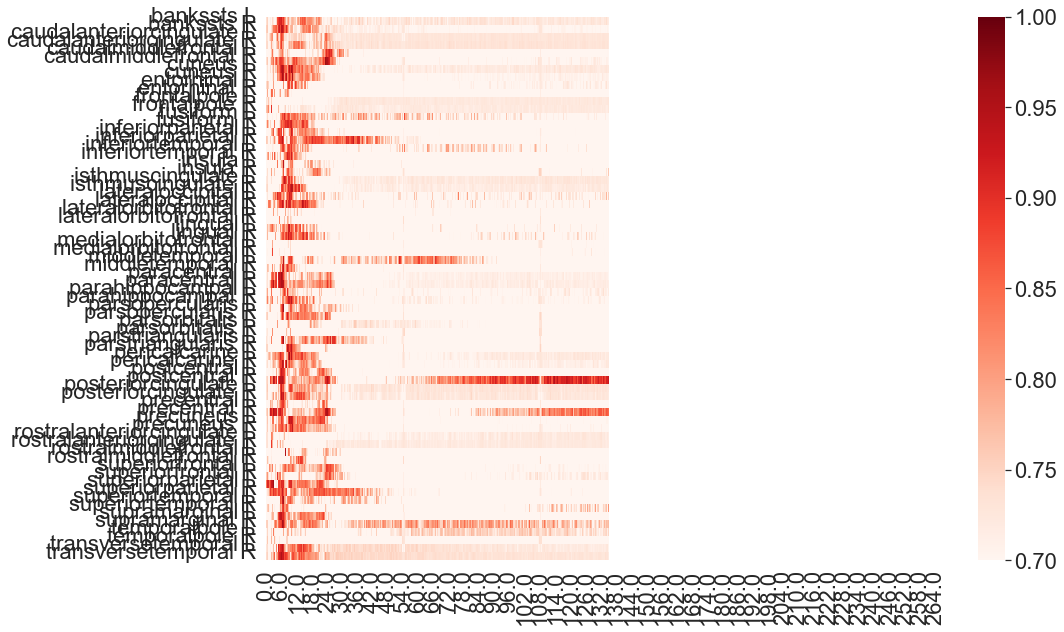

In [16]:

atlasdk=pd.read_csv('/Users/jason/Documents/PD_fingerprinting/dependencies/desikan_killiany_68.csv', header=None)
reshaped_icc=np.reshape(icc, (68,-1))
reshaped_icc.shape
#print(differential_power)
plt.figure(figsize=(15, 10))
axs = sns.heatmap(reshaped_icc, cmap='Reds', vmin=0.70, vmax=1)
plt.xticks(np.arange(0, 900, 20), np.arange(0, 300, 0.3)[range(0,900,20)])
plt.yticks(np.arange(0, 68, 1),atlasdk[atlasdk.columns[0]], rotation=0)
#plt.savefig("LAT_original_ICC_PSD_full_edgewise_CTL.pdf", bbox_inches='tight')

iccorig = pd.DataFrame(reshaped_icc)
iccorig.to_csv("testICC.csv", header=False, index=False)
